<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Install

```sh
pip install forensicface
```

Os arquivos onnx dos modelos de detecção (det_10g.onnx), pose (1k3d68.onnx) e gênero/idade (genderage.onnx) devem estar na pasta `~/.insightface/model/<model_name>/`

 O arquivo onnx do modelo de reconhecimento (adaface_ir101web12m.onnx) deve estar na pasta `~/.insightface/model/<model_name>/adaface/`

 O arquivo onnx do modelo de qualidade CR_FIQA (cr_fiqa_l.onnx) deve estar na pasta `~/.insightface/model/<model_name>/cr_fiqa/`

 O modelo padrão é denominado `sepaelv2`. A partir da versão 0.1.5 é possível utilizar outros modelos.

## Como utilizar

Importação da classe ForensicFace:

In [1]:
from forensicface.app import ForensicFace

Instanciamento do ForensicFace:

In [2]:
ff = ForensicFace(det_size=320, use_gpu=True, extended=True)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0'}}
find model: /home/rafael/.insightface/models/sepaelv2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cud

## Processamento básico de imagens
Obter pontos de referência, distância interpupilar, representação vetorial, a face alinhada com dimensão fixa (112x112), estimativas de sexo, idade, pose (_pitch_, _yaw_, _roll_) e qualidade. Opcionalmente, é possível anotar a face alinhada com os pontos de referência utilizados no alinhamento (parâmetro `draw_kypoints`).

In [7]:
results = ff.process_image_single_face("obama2.png", draw_keypoints=True)
results.keys()

/home/rafael/miniconda3/envs/ffdev/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


dict_keys(['keypoints', 'ipd', 'embedding', 'norm', 'bbox', 'det_score', 'aligned_face', 'gender', 'age', 'pitch', 'yaw', 'roll', 'fiqa_score'])

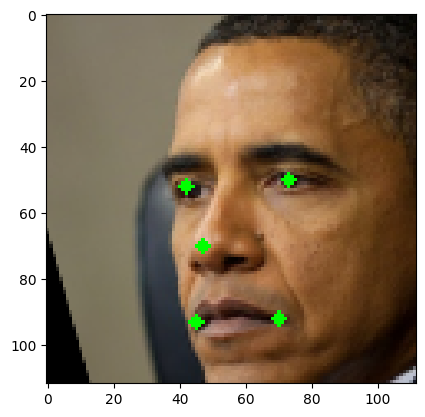

In [8]:
plt.imshow(results["aligned_face"])

Comparar duas imagens faciais e obter o escore de similaridade.

In [ ]:
ff.compare("obama.png", "obama2.png")

0.8556093

Agregar embeddings de duas imagens faciais em uma única representação, com ponderação por qualidade

In [ ]:
agg = ff.aggregate_from_images(["obama.png", "obama2.png"], quality_weight=True)
agg.shape

(512,)

## Estimativa de qualidade CR-FIQA

Estimativa de qualidade pelo método [CR-FIQA](https://github.com/fdbtrs/CR-FIQA)

Para desabilitar, instancie o forensicface com a opção extended = False:

``ff = ForensicFace(extended=False)``

Obs.: a opção `extended = False` também desabilita as estimativas de sexo, idade e pose.

In [ ]:
good = ff.process_image("001_frontal.jpg")
bad = ff.process_image("001_cam1_1.jpg")
good["fiqa_score"], bad["fiqa_score"]

(2.3786173, 1.4386057)

## Crédito dos modelos utilizados

- Detecção, gênero (M/F), idade e pose (pitch, yaw, roll): [insightface](https://github.com/deepinsight/insightface)

- Reconhecimento: [adaface](https://github.com/mk-minchul/AdaFace)

- Estimativa de qualidade: [CR-FIQA](https://github.com/fdbtrs/CR-FIQA)